### Imports 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from IPython.display import Image, display
%matplotlib inline

# Today you are a Machine Learning Engineer in the Department of Marketing and Inventory @ Walmart Labs.
This work relies on processed data from Kaggle https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

This work is motivated by the publication https://arxiv.org/pdf/2010.02503.pdf

*You have access to the Walmart server data, specifically the Electronics section, such that you have NO customer facing information, but you do have access to timestamped data regarding product viewing/carting/purchasing. We will use this data to build a model of whether a not some product will be purchased.*

### If running this notebook in Google Colab, run the following cell first to mount your Google Drive

^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

## Task 1: Read in the data

You should have four files:

* `some_column_descriptions.png`
* `user_journey_descriptions.png`
* `X_train.csv`
* `X_test.csv`

We'll start by looking at the descriptions before loading in the csv files.

1. Use the `IPython.display` module to view the `some_column_descriptions.png` file.

    Look through the column names and descriptions to get an idea of what the data is.

In [2]:

# change the filename to wherever you downloaded/uploaded the file
#filename = '/content/drive/My Drive/Datasets/week_2/some_column_descriptions.png'
#display(Image(filename=filename))

The dataset has User-journey data, i.e. it tracks information user/product pairs over time to see if the combination results in a purchase.

2. Look at the `user_journey_descriptions.png` file.

    Review the data sample to get a sense of what information we are tracking for each user/product pair.

In [3]:
# change path to wherever you uploaded/downloaded the file
#filename='/content/drive/My Drive/Datasets/week_2/user_journey_descriptions.png'
#display(Image(filename=filename))

The dataset we are working with is essentially what we have screenshotted above, but has been anonomized by removing product IDs and user IDs.

3. Use the pandas `read_csv()` and `head()` functions to read in the training data (`X_train.csv`) and look at the first few rows.

    Note the Purchase column has either 0 (not purchased) or 1 (purchased).

In [6]:
# [YOUR CODE HERE]
train_df = pd.read_csv("X_train.csv")

4. Similarly, read in the test data (`X_test.csv`) and look at the first few rows.

In [7]:
# [YOUR CODE HERE]
test_df = pd.read_csv("X_test.csv")

## Task 2: Understand the Data

*Our goal in this assignment is to predict whether a customer/product pair will result in a purchase. As part of this, we will want to identify what features are most important for making this classification.*

We'll start with digging into our dataset.

1. For the training data, print out the datatype of each feature (column), and identify which ones are non-numeric

In [8]:
# [YOUR CODE HERE]
# Here are the numeric columns 
train_df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645816 entries, 0 to 645815
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NumOfEventsInJourney  645816 non-null  int64  
 1   NumSessions           645816 non-null  int64  
 2   interactionTime       645816 non-null  float64
 3   maxPrice              645816 non-null  float64
 4   minPrice              645816 non-null  float64
 5   NumCart               645816 non-null  int64  
 6   NumView               645816 non-null  int64  
 7   InsessionCart         645816 non-null  int64  
 8   InsessionView         645816 non-null  int64  
 9   year                  645816 non-null  int64  
 10  month                 645816 non-null  int64  
 11  Weekend               645816 non-null  int64  
 12  Purchase              645816 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 64.1 MB


## Here are the non-numeric ones

In [9]:
train_df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645816 entries, 0 to 645815
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   weekday    645816 non-null  object
 1   timeOfDay  645816 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


2. Print the unique values for the year, month and weekend features.

In [10]:
# [YOUR CODE HERE]
print(test_df[["Weekend", "year", "month"]].nunique())
print()
print(train_df[["Weekend", "year", "month"]].nunique())


Weekend    1
year       1
month      1
dtype: int64

Weekend    1
year       1
month      1
dtype: int64


3. Since these columns each only have one unique value, they will not be valuable features, so drop the three columns in both the training set and the test set.

    Make sure to use `inplace=True` to modify the DataFrame.
    
    Print the shape of the DataFrames to verify the columns were dropped.

In [11]:
# [YOUR CODE HERE]
train_df.drop(["Weekend", "year", "month"], inplace=True, axis=1)
test_df.drop(["Weekend", "year", "month"], inplace=True, axis=1)

4. For each non-numeric feature, print the unique values.

In [12]:
# [YOUR CODE HERE]
def print_unique_values(df, columns):
    print(df[columns].apply(lambda col: col.unique()))
    
columns =  ["weekday","timeOfDay"]
print("for train_df\n")
print_unique_values(train_df, columns)

print("\n**** for test_df ******")
print_unique_values(test_df, columns)

for train_df

  weekday     timeOfDay
0     Sat       Morning
1      Fr          Dawn
2     Thu     Afternoon
3     Mon          Noon
4     Tue       Evening
5     Wed  EarlyMorning
6     Sun         Night

**** for test_df ******
  weekday     timeOfDay
0     Wed  EarlyMorning
1      Fr       Morning
2     Sat     Afternoon
3     Sun          Dawn
4     Tue       Evening
5     Thu         Night
6     Mon          Noon


5. Convert the non-numeric features to numeric. These feature values are ordered temporally, so this makes some sense to do.

    Follow the example given for the weekday column to update the dayOfWeek column.
    
    Use the `.head()` method to inspect the dataset after the transformations.

In [13]:
def week_days_to_int(df): 
    weekday_strings = ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']
    weekday_ints = [1, 2, 3, 4, 5, 6, 7]
    df['weekday'] = df['weekday'].replace(weekday_strings, weekday_ints)
    return df

In [14]:
train_df = week_days_to_int(train_df) 
train_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    154.41    154.41   
1                     1            1              0.0     92.67     92.67   
2                     1            1              0.0    155.71    155.71   
3                     1            1              0.0    898.32    898.32   
4                     1            1              0.0    146.21    146.21   

   NumCart  NumView  InsessionCart  InsessionView  weekday  timeOfDay  \
0        0        1              0              1        6    Morning   
1        0        1              0              1        5       Dawn   
2        0        1              0              1        4  Afternoon   
3        0        1              0              1        1       Noon   
4        0        1              0              1        2       Noon   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

In [15]:
## need to encode timeofDya 
def encode_time_of_day(df):
    time_of_day_strings = ['Dawn', 'EarlyMorning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night']
    time_of_day_ints = [1, 2, 3, 4, 5, 6, 7]
    df['timeOfDay'] = df['timeOfDay'].replace(time_of_day_strings, time_of_day_ints)
    return df

In [16]:
train_df = encode_time_of_day(train_df)
train_df['timeOfDay']

0         3
1         1
2         5
3         4
4         4
         ..
645811    2
645812    2
645813    2
645814    6
645815    5
Name: timeOfDay, Length: 645816, dtype: int64

In [17]:
test_df = encode_time_of_day(test_df)
test_df['timeOfDay']

0         2
1         2
2         3
3         2
4         2
         ..
430539    6
430540    3
430541    6
430542    1
430543    6
Name: timeOfDay, Length: 430544, dtype: int64

6. Do the same conversions for the test set.

    Make sure to inspect the dataset to make sure it look as expected.

In [18]:
# [YOUR CODE HERE]
test_df = week_days_to_int(test_df) 
test_df.head()

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    126.86    126.86   
1                     2            2            182.0    118.38    118.38   
2                     1            1              0.0     63.77     63.77   
3                     1            1              0.0     32.18     32.18   
4                     1            1              0.0   1093.72   1093.72   

   NumCart  NumView  InsessionCart  InsessionView  weekday  timeOfDay  \
0        0        1              0              1        3          2   
1        0        2              0              1        5          2   
2        0        1              0              1        5          3   
3        0        1              0              3        5          2   
4        0        1              0              2        6          2   

   Purchase  
0         0  
1         0  
2         0  
3         0  
4         0

7. Use the `Purchase` columns of train and test datasets to determine the proportion of user journeys which result in purchases, in both the training and test datasets.

    Are the datasets balanced?

In [19]:
train_df.Purchase.value_counts(normalize = True)

0    0.9861
1    0.0139
Name: Purchase, dtype: float64

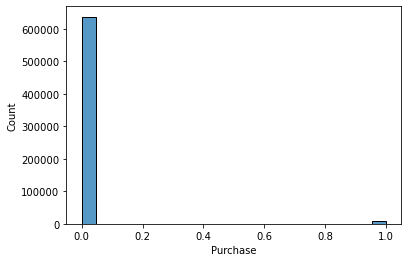

In [20]:
# [YOUR CODE HERE]
sns.histplot(data=train_df, x="Purchase"); 

In [21]:
test_df.Purchase.value_counts(normalize = True)

0    0.985785
1    0.014215
Name: Purchase, dtype: float64

## Task 3: Reduce the number of features

1. How many features does our dataset currently have?

In [22]:
# [YOUR CODE HERE]
len(train_df.columns) - 1

11

2. Draw a heatmap of the Pearson correlation.

    The plotting code is given to you, but you need to fill in the calculation of the Pearson correlation.

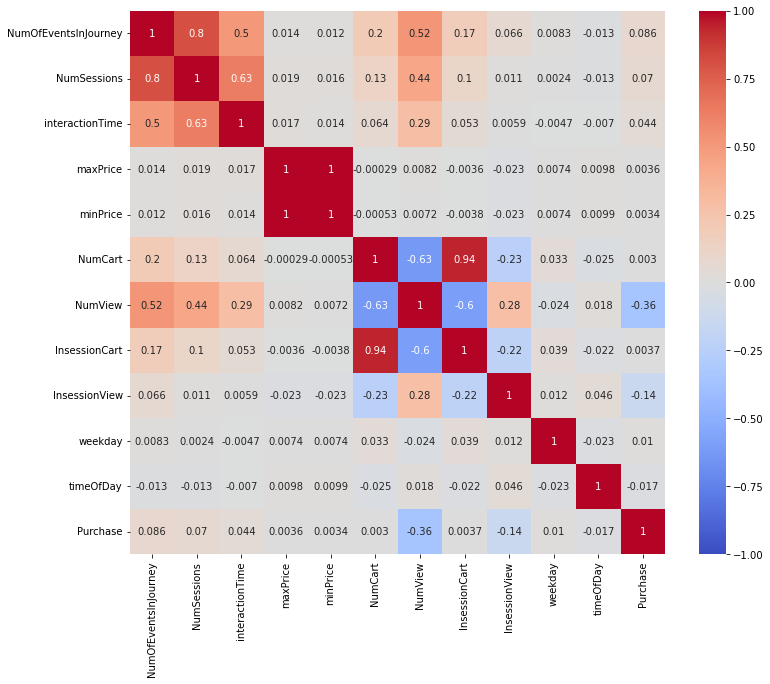

In [23]:
plt.figure(figsize=(12, 10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, fmt='.2g',vmin=-1, vmax=1, center= 0,  cmap= 'coolwarm');

NumCart (feature 5) (0.463125)
2. NumView (feature 6) (0.348510)
3. InsessionCart (feature 7) (0.101048)
4. InsessionView (feature 8) (0.047611)
5. NumOfEventsInJourney (feature 0) (0.017161)
6. weekday (feature 9) (0.005360)
7. interactionTime (feature 2) (0.005273)
8. NumSessions (feature 1) (0.005060)
9. maxPrice (feature 3) (0.002408)
10. minPrice (feature 4) (0.002338)
11. timeOfDay (feature 10) (0.002105)


['maxPrice', 'minPrice', 'NumCart', 'InsessionCart', 'NumOfEventsInJourney', 'NumSessions']  

drop minPrice , NumSessions, NumCart, 

3. Drop the features with high correlation.

    We'll do this by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair.

    Store the remaining set of features (the ones you didn't drop) in dataframes `train_df_reduced`.

In [50]:
# map features to their absolute correlation values
def get_correlated_columns(df, threshold=0.8):
    corr = df.corr().abs()
    # set equality (self correlation) as zero
    corr[corr == 1] = 0
    # of each feature, find the max correlation
    # and sort the resulting array in ascending order
    corr_cols = corr.max().sort_values(ascending=False)
    
    correlated_columns = list(corr_cols[corr_cols > threshold].index)
    columns_to_drop = correlated_columns[::2]
    print(correlated_columns)
    df_ = df.drop(columns_to_drop, axis = 1) 
    
    return df_


def drop_correlated_columns(df, columns_to_drop): 
    return df.drop(columns_to_drop, axis =1)       

In [ ]:
columns_to_drop = ["minPrice" , "NumSessions", "NumCart"] 

In [53]:
# [YOUR CODE HERE]
print(len(train_df.columns))
train_df_reduced = drop_correlated_columns(train_df, columns_to_drop)
print(len(train_df_reduced.columns))
train_df_reduced.head()

12
9


NumOfEventsInJourney  interactionTime  maxPrice  NumView  InsessionCart  \
0                     1              0.0    154.41        1              0   
1                     1              0.0     92.67        1              0   
2                     1              0.0    155.71        1              0   
3                     1              0.0    898.32        1              0   
4                     1              0.0    146.21        1              0   

   InsessionView  weekday  timeOfDay  Purchase  
0              1        6          3         0  
1              1        5          1         0  
2              1        4          5         0  
3              1        1          4         0  
4              1        2          4         0

5. How many columns are left in the DataFrame?

In [52]:
# [YOUR CODE HERE]
len(train_df_reduced.columns)

9

5. Remove the same features from the test set and save in a new dataframe `test_df_reduced`.

In [55]:
# [YOUR CODE HERE]
print(len(test_df.columns))
test_df_reduced = drop_correlated_columns(train_df, columns_to_drop)
print(len(test_df_reduced.columns))
test_df_reduced.head()

12
9


NumOfEventsInJourney  interactionTime  maxPrice  NumView  InsessionCart  \
0                     1              0.0    154.41        1              0   
1                     1              0.0     92.67        1              0   
2                     1              0.0    155.71        1              0   
3                     1              0.0    898.32        1              0   
4                     1              0.0    146.21        1              0   

   InsessionView  weekday  timeOfDay  Purchase  
0              1        6          3         0  
1              1        5          1         0  
2              1        4          5         0  
3              1        1          4         0  
4              1        2          4         0

6. Visualize the selected features. (Ignore the warning messages about distplot.)
    
    If you have time, experiment with some other visualizations of the data.

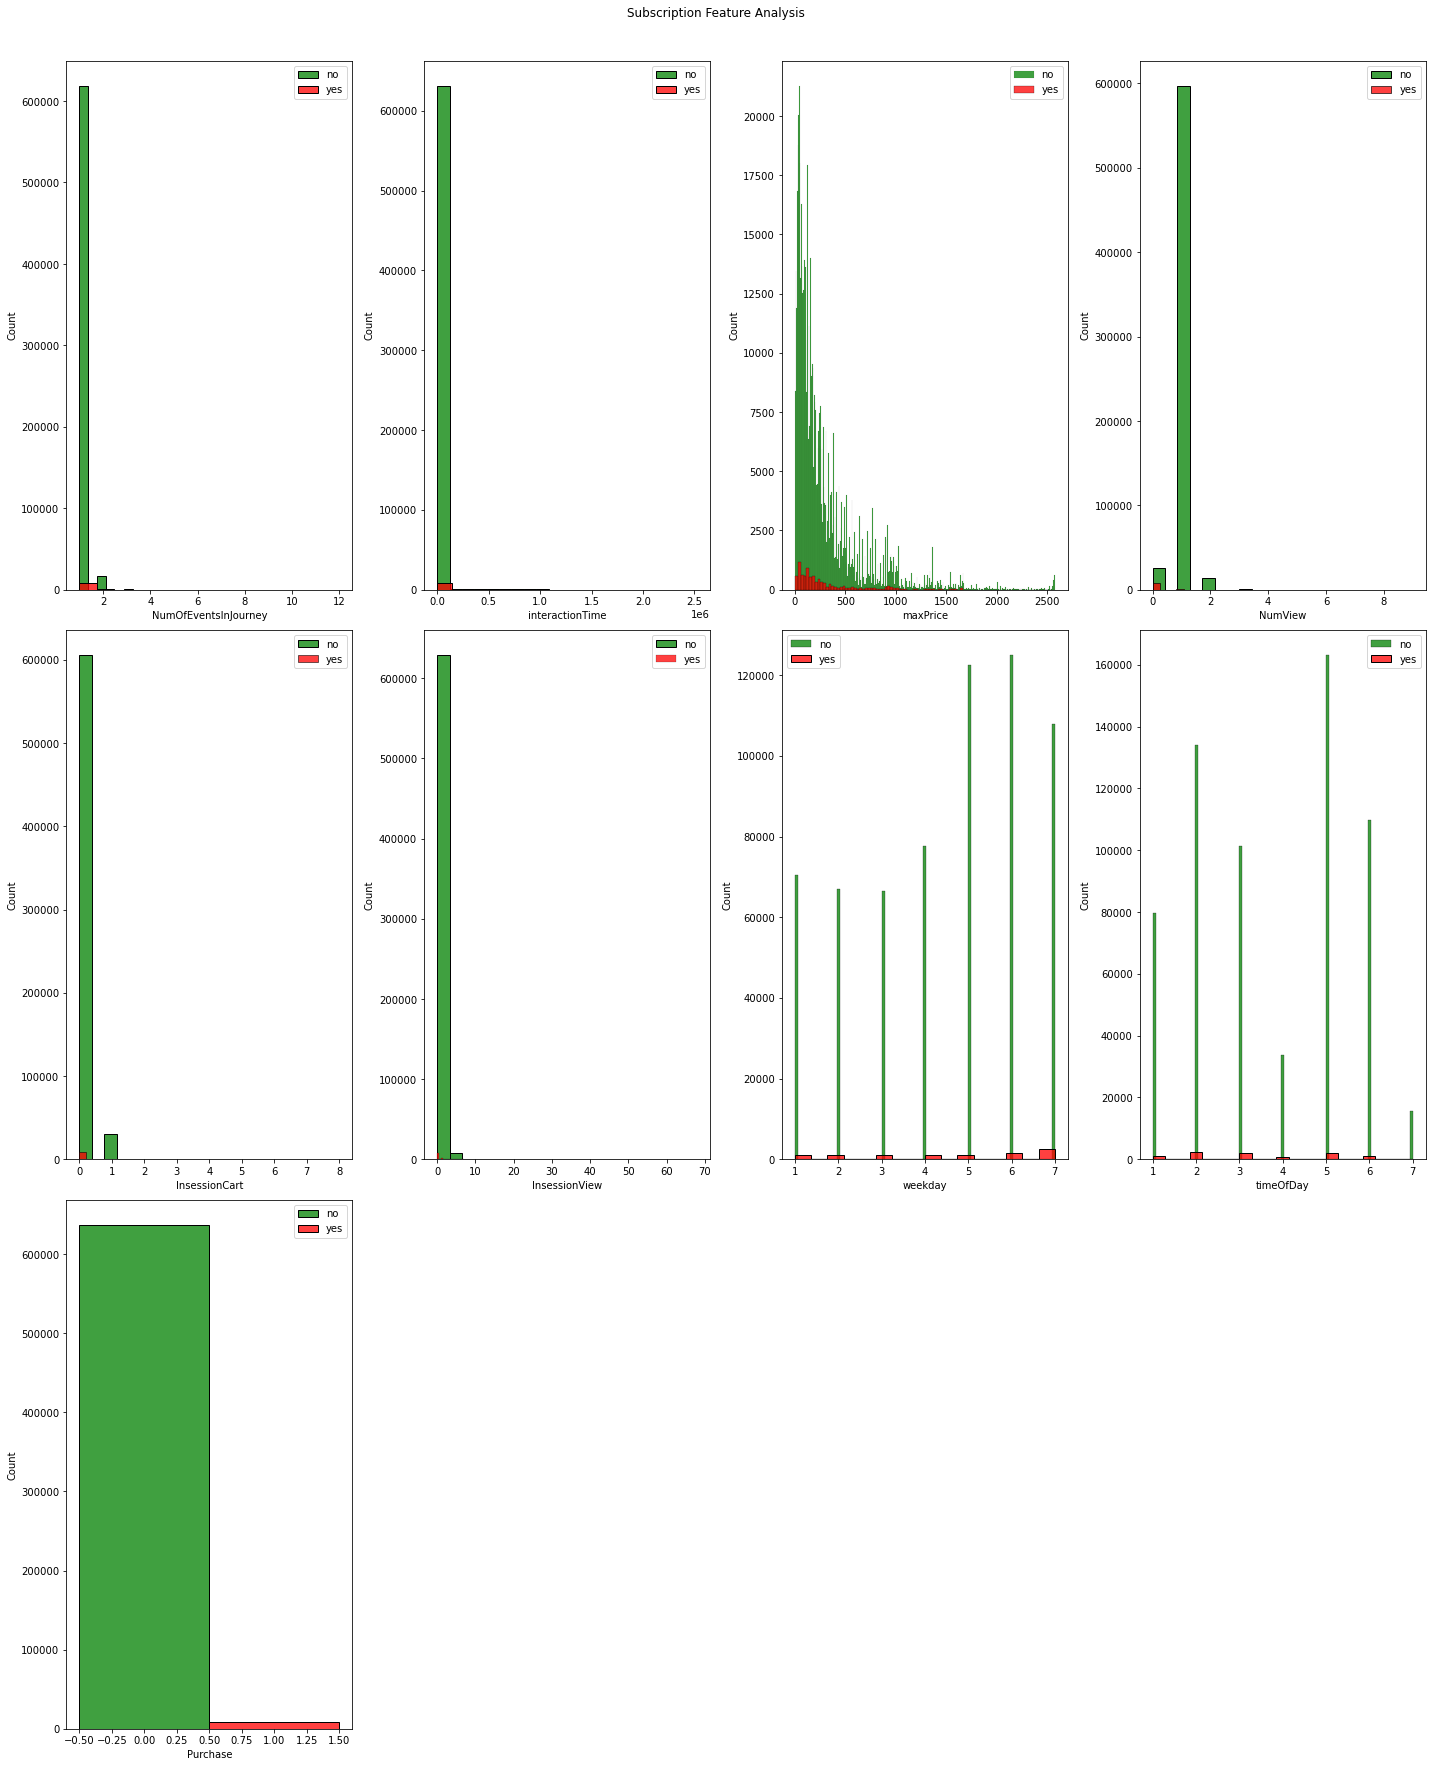

In [56]:
fig = plt.figure(figsize=(20, 25))
j = 0
for i in train_df_reduced.columns:
    plt.subplot(3, 4, j + 1)
    j += 1
    sns.histplot(train_df_reduced[i][train_df_reduced['Purchase'] == 0], color='g', label='no')
    sns.histplot(train_df_reduced[i][train_df_reduced['Purchase'] == 1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);
plt.show()

7. Make the NumPy arrays `X_train_reduced`, `X_test_reduced`, `y_train` and `y_test` from `train_df_reduced` and `test_df_reduced`. 

In [57]:
train_df_reduced.columns

Index(['NumOfEventsInJourney', 'interactionTime', 'maxPrice', 'NumView',
       'InsessionCart', 'InsessionView', 'weekday', 'timeOfDay', 'Purchase'],
      dtype='object')

In [58]:
# [YOUR CODE HERE]
# be explicitily about column names, grab the columns by name
X_train_reduced = train_df_reduced[['NumOfEventsInJourney', 'interactionTime', 'maxPrice', 'NumView',
                                    'InsessionCart', 'InsessionView', 'weekday', 'timeOfDay']].values
y_train = train_df_reduced[['Purchase']].values

X_test_reduced = test_df_reduced[['NumOfEventsInJourney', 'interactionTime', 'maxPrice', 'NumView',
                                  'InsessionCart', 'InsessionView', 'weekday', 'timeOfDay']].values

y_test = test_df_reduced[['Purchase']].values


8. Scale the features in `X_train_reduced` and `X_test_reduced` so that the max norm of each feature is 1.

In [59]:
from sklearn.preprocessing import normalize  # you can use this module, (but you don't have to)

# [YOUR CODE HERE]
X_train_reduced_normalized = normalize(X_train_reduced, norm='max', axis=0)
X_test_reduced_normalized = normalize(X_test_reduced, norm='max', axis=0)

In the cell below we show you how to use a Random Forest to rank features based on a measure of importance called the Gini Importance. We'll provide you with all the code, but you may want to read up on sklearn's [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and its [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier.feature_importances_) property.

9. Look at the results below to note the most important features.

Feature ranking:
1. InsessionCart (feature 4) (0.572545)
2. NumView (feature 3) (0.308459)
3. InsessionView (feature 5) (0.042478)
4. NumOfEventsInJourney (feature 0) (0.027211)
5. maxPrice (feature 2) (0.016639)
6. interactionTime (feature 1) (0.016094)
7. weekday (feature 6) (0.011544)
8. timeOfDay (feature 7) (0.005030)


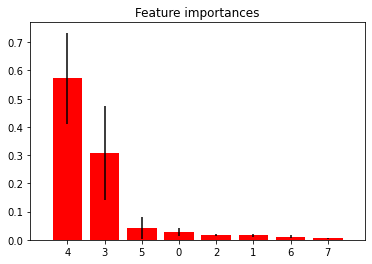

In [60]:
# Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train_reduced_normalized, y_train.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_reduced_normalized.shape[1]):
    print("%d. %s (feature %d) (%f)" %
          (f + 1, train_df_reduced.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_reduced_normalized.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]]);

Thus features 3 and 4 (numcart, numview) are the top two most important features (according to the Random Forest model). We'll use these two features, along with interaction time (feature 1) for visualization of the data, but we'll fit classification models using all 6 of the features. Let's set up a convenient function for the visualization with the numcart and numview features.

In [39]:
# This function visualizes the classification output on a scatter plot,
# indicating the 4 types of outputs in a confusion matrix 
# (True Positive, True Negative, False Negative, False Positive)
from mpl_toolkits import mplot3d
def visualize_scatter_plot(X, y, yhat, title):
    loc11 = np.where((y > 0) & (yhat > 0), 1, 0) #TP
    loc00 = np.where((y == 0) & (yhat == 0), 1, 0) #TN
    loc10 = np.where((y > 0) & (yhat == 0), 1, 0) #FN
    loc01 = np.where((y == 0) & (yhat > 0), 1, 0) #FP
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    ax.scatter3D(
        X[np.where(loc00 > 0), 3],
        X[np.where(loc00 > 0), 4],
        X[np.where(loc00 > 0), 1],
        color='blue',
        marker='o')
    ax.scatter3D(
        X[np.where(loc10 > 0), 3],
        X[np.where(loc10 > 0), 4],
        X[np.where(loc10 > 0), 1],
        color='cyan',
        marker='o')
    ax.scatter3D(
        X[np.where(loc11 > 0), 3],
        X[np.where(loc11 > 0), 4],
        X[np.where(loc11 > 0), 1],
        color='orange',
        marker='^')
    ax.scatter3D(
        X[np.where(loc01 > 0), 3],
        X[np.where(loc01 > 0), 4],
        X[np.where(loc01 > 0), 1],
        color='green',
        marker='^')
    ax.set_xlabel('NumCart')
    ax.set_ylabel('NumViews')
    ax.set_zlabel('InteractionTime')
    plt.title(title)
    plt.show()

## Task 4: Build Logistic Regression and SVM models

We will be fitting both a Logistic Regression and SVM model to the reduced features and then looking at classification metrics such as Accuracy, Precision, Recall, and F1-score.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

1. Instantiate, train, and predict with the Logistic Regression model.

    Make sure to account for the imbalanced classes with with `class_weight` parameter.

    Remember to use the ***train*** data for building the model and the ***test*** data when making and evaluating the predictions

In [61]:
# [YOUR CODE HERE]
lr =  LogisticRegression(class_weight="balanced")
lr.fit(X_train_reduced_normalized, y_train.ravel())

LogisticRegression(class_weight='balanced')

In [62]:
y_pred = lr.predict(X_test_reduced_normalized)

2. Calculate these classification metrics for the Logistic Regression model:

    * accuracy
    * precision
    * recall
    * f1 score
    * confusion matrix

In [63]:

def get_classification_metrics(y_test, y_pred): 
    metrics_dict = {} 
    metrics_dict["ACC"] = accuracy(y_test, y_pred)
    metrics_dict["PREC"]  = precision(y_test, y_pred)
    metrics_dict["REC"]  = recall(y_test, y_pred)
    metrics_dict["F1_SCORE"]  =  f1_score(y_test, y_pred)
    metrics_dict["CONFUSION_MATRIX"]  = confusion_matrix(y_test, y_pred)
    return metrics_dict

In [64]:
# [YOUR CODE HERE]
pprint.pprint(get_classification_metrics(y_test, y_pred))

{'ACC': 0.9987751929342104,
 'CONFUSION_MATRIX': array([[636127,    712],
       [    79,   8898]]),
 'F1_SCORE': 0.9574433744014633,
 'PREC': 0.9259105098855359,
 'REC': 0.9911997326501059}


3. Use the `visualize_scatter_plot()` function to visualize the performance of the Logistic Regression model.

In [ ]:
# [YOUR CODE HERE]
visualize_scatter_plot(X_test_reduced_normalized, y_test, y_pred, "Logistic Regression model")

4. Instantiate, train and predict with the SVM mode.

    Again, remember to account fo the imbalanced classes.

In [65]:
# [YOUR CODE HERE]
lsvc = LinearSVC()
lsvc.fit(X_train_reduced_normalized, y_train.ravel())

LinearSVC()

In [66]:
y_pred = lsvc.predict(X_test_reduced_normalized)

5. Calculate the classification metrics for the SVM model.

In [67]:
# [YOUR CODE HERE]
pprint.pprint(get_classification_metrics(y_test, y_pred))

{'ACC': 0.9993945643960509,
 'CONFUSION_MATRIX': array([[636550,    289],
       [   102,   8875]]),
 'F1_SCORE': 0.9784466126453889,
 'PREC': 0.9684635530336098,
 'REC': 0.988637629497605}


6. Use the `visualize_scatter_plot()` function to visualize the performance of the SVM model.

In [68]:
# [YOUR CODE HERE]
visualize_scatter_plot(X_test_reduced_normalized, y_test, y_pred, "Logistic Regression model")

NameError: name 'visualize_scatter_plot' is not defined

## Task 5: Fit a Non-Linear Classifier, the Gradient Boosted Tree.

1. Instantiate, train, and predict with the Gradient Boosted Trees model.

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# [YOUR CODE HERE]
grbc = GradientBoostingClassifier()
grbc.fit(X_train_reduced_normalized, y_train.ravel())
y_pred = grbc.predict(X_test_reduced_normalized)

2. Evaluate the model by calculating the classification metrics.

In [70]:
# [YOUR CODE HERE]
pprint.pprint(get_classification_metrics(y_test, y_pred))

{'ACC': 0.9995091481164914,
 'CONFUSION_MATRIX': array([[636802,     37],
       [   280,   8697]]),
 'F1_SCORE': 0.9821015188301054,
 'PREC': 0.995763682161667,
 'REC': 0.9688091790130333}


3. Visualize the performance with the `visualize_scatter_plot()` function.

In [ ]:
# [YOUR CODE HERE]
visualize_scatter_plot(X_test_reduced_normalized, y_test, y_pred, "Logistic Regression model")

## Task 6: Analyze importace of data sample balancing using a Random Forest

1. Instantiate, train, predict with, and evaluate an unbalanced random forest classifier. (Follow the same steps you did above with the other models)

In [71]:
from sklearn.ensemble import RandomForestClassifier

# [YOUR CODE HERE]
rfc = RandomForestClassifier()
rfc.fit(X_train_reduced_normalized, y_train.ravel())
y_pred = rfc.predict(X_test_reduced_normalized)
pprint.pprint(get_classification_metrics(y_test, y_pred))

{'ACC': 0.999969031426908,
 'CONFUSION_MATRIX': array([[636839,      0],
       [    20,   8957]]),
 'F1_SCORE': 0.998884799821568,
 'PREC': 1.0,
 'REC': 0.9977720842152167}


2. Repeat the previous exercise, but this time, incorporate class-balanced penalty weights

In [72]:
# [YOUR CODE HERE]
rfc = RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train_reduced_normalized, y_train.ravel())
y_pred = rfc.predict(X_test_reduced_normalized)
pprint.pprint(get_classification_metrics(y_test, y_pred))

{'ACC': 0.9999179332813062,
 'CONFUSION_MATRIX': array([[636786,     53],
       [     0,   8977]]),
 'F1_SCORE': 0.9970567001721553,
 'PREC': 0.9941306755260244,
 'REC': 1.0}


3. Visualize a Decision Tree. Spend some time inspecting this visualization of the tree--what does each line in the boxes mean? Discuss this with your partners. What does the "value=..." line indicate?

In [47]:
from sklearn.tree import export_graphviz
from subprocess import call
"""
export_graphviz(rfc.estimators_[0], max_depth=5, out_file='tree.dot', 
                feature_names = selected_columns[:-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
"""
export_graphviz(rfc.estimators_[0], max_depth=5, out_file='tree.dot', 
                feature_names =test_df_reduced.columns[:-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')